In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Step b: Upload / Access the Dataset
data = pd.read_csv('creditcard.csv')  # Ensure that 'creditcard.csv' is in the current directory or provide the correct path


In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Preprocess the data
X = data.drop(columns=['Class'])  # Features (input)
y = data['Class']  # Labels (output)


In [5]:
# Normalize the features (Scaling the input data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Step c: Encoder - Convert input data to a latent representation
input_dim = X_train.shape[1]  # Number of features
input_layer = Input(shape=(input_dim,))

In [8]:
# Encoder network
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Latent representation

# Step d: Decoder - Reconstruct the input data from the latent representation
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Reconstructed output layer, should match the input dimensions


In [9]:
# Step e: Combine encoder and decoder to create the full Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [10]:
# Compile the model with optimizer, loss function, and evaluation metrics
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [11]:
# Summary of the model architecture
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 30)                3870  

In [12]:
# Train the Autoencoder model
history = autoencoder.fit(
    X_train, X_train,  # We are training the model to reconstruct the input data (X_train)
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)  # Using X_test for validation
)

Epoch 1/50


3561/3561 [==============================] - 7s 2ms/step - loss: 0.7474 - mae: 0.4974 - val_loss: 0.6990 - val_mae: 0.4680
Epoch 2/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.7072 - mae: 0.4595 - val_loss: 0.6919 - val_mae: 0.4530
Epoch 3/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.7061 - mae: 0.4572 - val_loss: 0.6869 - val_mae: 0.4543
Epoch 4/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.6946 - mae: 0.4475 - val_loss: 0.6820 - val_mae: 0.4488
Epoch 5/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.6973 - mae: 0.4487 - val_loss: 0.6800 - val_mae: 0.4431
Epoch 6/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.6925 - mae: 0.4428 - val_loss: 0.6807 - val_mae: 0.4443
Epoch 7/50
3561/3561 [==============================] - 5s 1ms/step - loss: 0.7061 - mae: 0.4498 - val_loss: 0.6803 - val_mae: 0.4431
Epoch 8/50
3561/3561 [==============================] - 5s 1

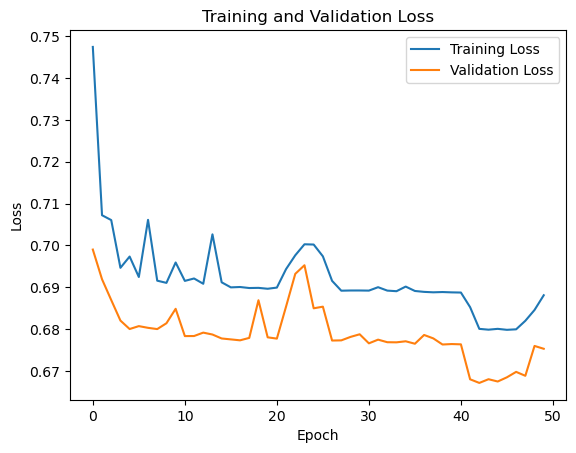

In [13]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# Step: Anomaly Detection using Reconstruction Error
# Use the trained autoencoder model to predict on the test set
X_test_pred = autoencoder.predict(X_test)

# Calculate the reconstruction error (MSE) for each data point
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

# Define a threshold for anomaly detection (95th percentile of the reconstruction error)
threshold = np.percentile(reconstruction_error, 95)

# Anomalies are those data points where the reconstruction error is greater than the threshold
anomalies = reconstruction_error > threshold


1781/1781 [==============================] - 2s 831us/step


In [15]:
# Step: Evaluation using Confusion Matrix and Classification Report
# Evaluate the performance of the anomaly detection model by comparing predicted anomalies with true labels
print("Confusion Matrix:\n", confusion_matrix(y_test, anomalies))
print("\nClassification Report:\n", classification_report(y_test, anomalies))


Confusion Matrix:
 [[54103  2761]
 [   10    88]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962

